In [139]:
import numpy as np
import matplotlib.pyplot as plt

In [140]:
x=np.loadtxt('/Users/ushakiranmayee/Documents/ML/DATASETS/Gisette/gisette_train.data')
xt=np.loadtxt('/Users/ushakiranmayee/Documents/ML/DATASETS/Gisette/gisette_valid.data')
y=np.loadtxt('/Users/ushakiranmayee/Documents/ML/DATASETS/Gisette/gisette_train.labels')
yt=np.loadtxt('/Users/ushakiranmayee/Documents/ML/DATASETS/Gisette/gisette_valid.labels')

In [141]:
sdx=np.std(x,axis=0)
x=x[:,sdx>0]
xt=xt[:,sdx>0]

xm=np.mean(x,axis=0)
sdx=np.std(x,axis=0)

x=(x-xm)/sdx
xt=(xt-xm)/sdx

In [142]:
y[y<0]=0
yt[yt<0]=0

In [143]:
n=x.shape[0]
nt=xt.shape[0]
x=np.concatenate((np.ones((n,1)),x), axis=1)
xt=np.concatenate((np.ones((nt,1)),xt), axis=1)
print(x.shape,xt.shape)

(6000, 4956) (1000, 4956)


In [144]:
# Train_error=[]
# for i in range(100):
#         w=w_update(w,x,y,N)
#         w=operator(w,0.053,eta)
#         pred_y = predict(x, w)
#         error_train = np.mean(pred_y != y)
#         Train_error.append(error_train)
# print(np.count_nonzero(w))
# plt.plot(range(100),Train_error)
# #lamdas=[0.14,0.099,0.07,0.052,0.04]

In [152]:
def sigmoid(xw):
    return 1/(1+np.exp(-xw))

def w_update(w,x,y,N):
    sig=1/(1+np.exp(-np.dot(x,w)))
    eta=1/N
    temp=(x.T@(y-sig))
    return w+eta*temp


def loglik(xw,y):
    yxw=y.reshape(-1)*xw.reshape(-1)
    lexw=np.log(1+np.exp(-yxw))
    return np.sum(lexw)
def operator(x,lamda):
    for i in range(len(w)):
        if np.absolute(w[i])<=lamda:
            w[i]=0
        else:
            w[i]=w[i]/(1+0)
    return w 
def penalty(lamda,w):
    penalty=0
    for i in w:
        if np.absolute(i)<lamda:
            penalty += (lamda**2 + (np.absolute(w)-lamda)**2)
        else:
            penalty+=lamda**2
    return penalty
def predict(x,w):
    xw=np.dot(x,w)
    p=1/(1+np.exp(-xw))
    pred_y=np.where(p>0.5,1,-1)
    return pred_y

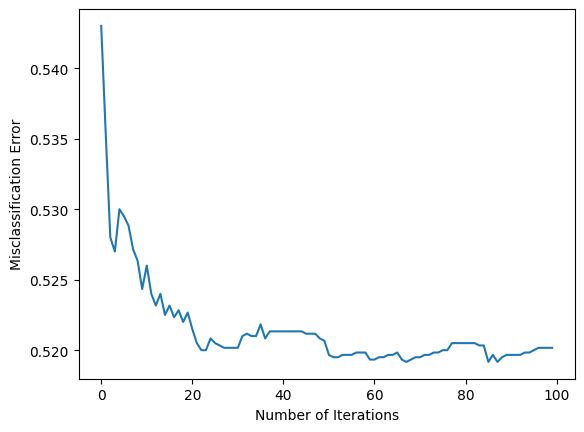

In [155]:
#1. Train misclassification error vs iteration number for Features=30

N=x.shape[0]
p=x.shape[1]

#For each feature we are declaring the corresponding lamda in an array
features=[10,30,100,300,500]
lamdas=[0.14,0.099,0.07,0.052,0.04]
Train_error=[]
Test_error=[]

for lamda in lamdas:
    #features=30, lamda=0.099
    w=np.zeros((p))
    if lamda==0.099:
        for i in range(100):
            w=w_update(w,x,y,N)
            w=operator(w,lamda)
            
            pred_y = predict(x, w)
            error_train = np.mean(pred_y != y)
            Train_error.append(error_train)
        plt.plot(range(100),Train_error,label='Features: 30')
        plt.xlabel('Number of Iterations')
        plt.ylabel('Misclassification Error')
        


Train Error:  [0.53, 0.5201666666666667, 0.5098333333333334, 0.505, 0.5045]
Test error:  [0.535, 0.519, 0.511, 0.506, 0.507]


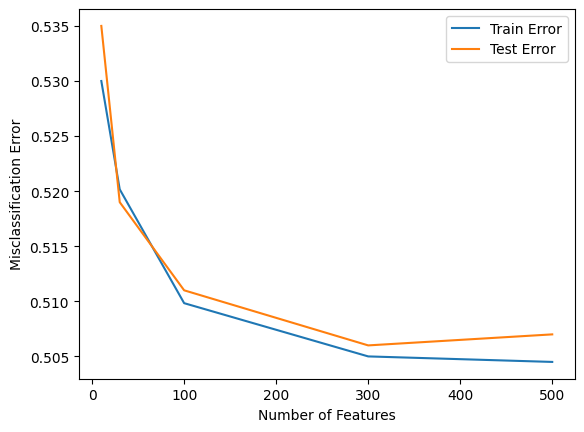

In [168]:
#2. Train and Test misclassification error vs Number of Selected Features

N=x.shape[0]
p=x.shape[1]

#For each feature we are declaring the corresponding lamda in an array
features=[10,30,100,300,500]
lamdas=[0.14,0.099,0.07,0.052,0.04]
Train_error=[]
Test_error=[]

for lamda in lamdas:
    w=np.zeros((p))
    for i in range(100):
        w=w_update(w,x,y,N)
        w=operator(w,lamda)
    
    pred_y = predict(x, w)
    error_train = np.mean(pred_y != y)
    Train_error.append(error_train)

    pred_yt = predict(xt, w)
    error_test = np.mean(pred_yt != yt)
    Test_error.append(error_test)

print("Train Error: ",Train_error)
print("Test error: ",Test_error)
plt.plot(features,Train_error,label="Train Error")
plt.plot(features,Test_error, label="Test Error")
plt.xlabel('Number of Features')
plt.ylabel('Misclassification Error')
plt.legend()
        

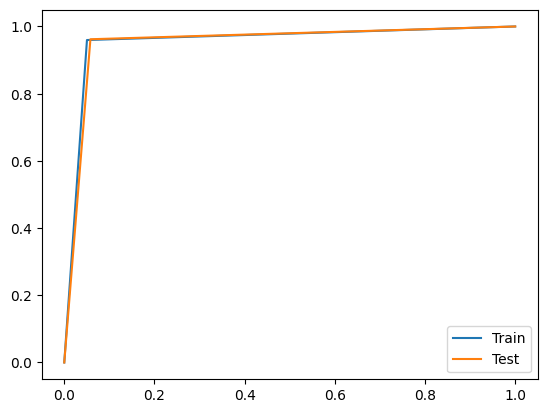

In [169]:
#3. Plot the ROC curve
from sklearn import metrics
lamda=0.099 #for 100 features lamda considered in 0.099
w=np.zeros((x.shape[1]))
Actual=y
for i in range(100):
    w=w_update(w,x,y,N)
    w=operator(w,lamda)
Pred=predict(x,w)
fpr,tpr,auc=metrics.roc_curve(Actual,Pred)

Actual_t=yt
Pred_t=predict(xt,w)
fprt,tprt,auct=metrics.roc_curve(Actual_t,Pred_t)

plt.plot(fpr,tpr,label="Train AUC: "+str(roc_auc_score(y,))
plt.plot(fprt,tprt,label="Test")
plt.legend()

print(Train_AUC", auc)



In [154]:
Train_error=[]
for i in range(100):
        xw= x@w
        sig=sigmoid(xw)
        w=w_update(w,x,y,N)
        w=operator(w,0.053,eta)
        pred_y = predict(x, w)
        error_train = np.mean(pred_y != y)
        Train_error.append(error_train)

plt.plot(range(100),Train_error)

TypeError: w_update() takes 4 positional arguments but 5 were given

In [ ]:
# l=(loglik(xw,y) + lamda*penalty(lamda,w))/N
            # loss.append(l)
        # plt.plot(range(100),loss,label=f'Features: {fn}')
        # plt.yscale('log')  # Use log scale for the y-axis
        # plt.show()

#     pred_yt = predict(xt, w)
#     error_test = np.mean(pred_yt != yt)
#     Test_error.append(error_test)
# print("T.E: ",Train_error)
# print("t.e",Test_error)

# plt.plot(features, Train_error, label='Training Error')
# plt.plot(features, Test_error, label='Test Error')
# plt.xlabel('Features')
# plt.ylabel('Misclassification Error')
# plt.title('Variation in Training and Test Errors with features for Madelon DataSet')
# plt.legend()
    
    

